In [21]:
import pandas as pd
import ast
import numpy as np

from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt 
import seaborn as sns

In [16]:
df = pd.read_csv("tmdb_5000_movies.csv")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [17]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [18]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [19]:
df.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [20]:
def clean_genres(genre_string):
    try:
        genre_list = ast.literal_eval(genre_string)
        genre_names = [genre['name'] for genre in genre_list]
        return ', '.join(genre_names)
    except Exception as e:
        return None  

df['genres'] = df['genres'].apply(clean_genres)

print(df.genres)

0       Action, Adventure, Fantasy, Science Fiction
1                        Adventure, Fantasy, Action
2                          Action, Adventure, Crime
3                    Action, Crime, Drama, Thriller
4                Action, Adventure, Science Fiction
                           ...                     
4798                        Action, Crime, Thriller
4799                                Comedy, Romance
4800               Comedy, Drama, Romance, TV Movie
4801                                               
4802                                    Documentary
Name: genres, Length: 4803, dtype: object


In [23]:
df['genres'] = df['genres'].apply(lambda x: x.split(', ') if x is not None else [])

mlb = MultiLabelBinarizer()

genre_dummies = pd.DataFrame(mlb.fit_transform(df['genres']), columns=mlb.classes_, index=df.index)

df = pd.concat([df, genre_dummies], axis=1)

In [27]:
df.iloc[0]

budget                                                          237000000
genres                      [Action, Adventure, Fantasy, Science Fiction]
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

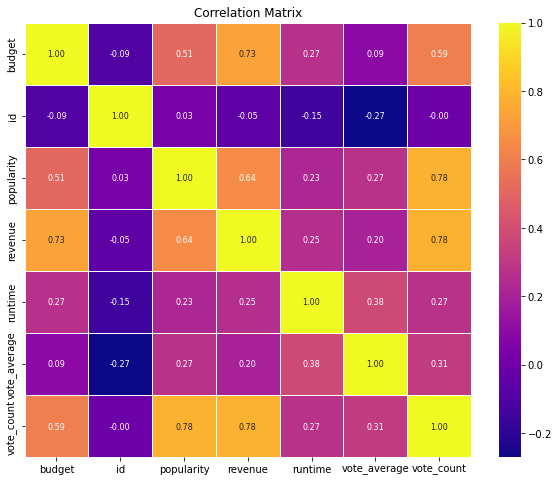

In [77]:
corr = df.corr()

plt.figure(figsize=(10, 8))  

sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5, cmap='plasma', annot_kws={"fontsize": 8})

plt.title('Correlation Matrix')
plt.show()

In [78]:
df = df.drop(['homepage','tagline'], axis=1)

corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

df = df.drop(to_drop, axis=1)

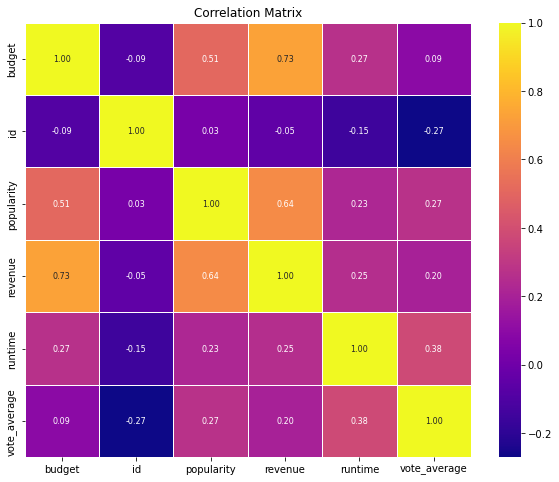

In [79]:
corr = df.corr()

plt.figure(figsize=(10, 8))  

sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5, cmap='plasma', annot_kws={"fontsize": 8})

plt.title('Correlation Matrix')
plt.show()

In [80]:
df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average'],
      dtype='object')

In [81]:
# plt.figure(figsize=(40, 20))

# colors = sns.color_palette('Blues')

# ax = plt.gca()
# ax.set_facecolor('#f7f7f7')
# ax.patch.set_alpha(0.8)

# plt.title('Movie budget', fontsize=20)
# plt.plot(df[''], df['title'], color=colors[4], linewidth=2.5)
# plt.xlabel('Title', fontsize=18)
# plt.ylabel('Budget USD ($)', fontsize=18)

# plt.xticks(rotation=90, ha='right', fontsize=12)
# plt.yticks(rotation=90,fontsize=12)

# plt.grid(True, linestyle='--', alpha=0.5)

# ax.xaxis.grid(color='white', linestyle='-', linewidth=0.5)
# ax.yaxis.grid(color='white', linestyle='-', linewidth=0.5)

# sns.despine()

# plt.gca().set_rasterization_zorder(1)

# plt.tight_layout()
# plt.show()

<AxesSubplot:>

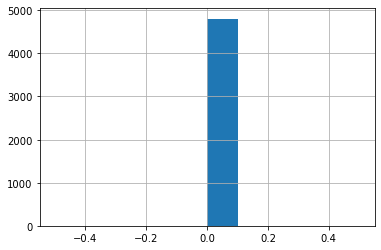

In [118]:
df['budget'].hist(bins=10)

In [163]:
df['budget'] = df['budget'] / 1000000
df['revenue'] = df['revenue'] / 1000000000

In [180]:
df[['title','budget','revenue']][0:20]

,title,budget,revenue
0,Avatar,237.0,2.787965
1,Pirates of the Caribbean: At World's End,300.0,0.961000
2,Spectre,245.0,0.880675
3,The Dark Knight Rises,250.0,1.084939
4,John Carter,260.0,0.284139
5,Spider-Man 3,258.0,0.890872
6,Tangled,260.0,0.591795
7,Avengers: Age of Ultron,280.0,1.405404
8,Harry Potter and the Half-Blood Prince,250.0,0.933959
9,Batman v Superman: Dawn of Justice,250.0,0.873260


In [ ]:
# plt.scatter(df['budget'],df['title'])
# plt.show()